### 15일차 2021-01-08 

In [1]:
# 오늘 할 일

# 1. 프로그래밍언어론 강의 듣기
# 2. 나동빈 유튜버 강의 듣기(dfs, bfs) / clear
# 3. 생활코딩 강의 듣기(웹 어플리케이션) 20회까지 / clear
# 4. 코딩테스트 문제 풀기 3개

##### 그래프 탐색 문제 1: 미로 탐색(실버 1)
https://www.acmicpc.net/problem/2178

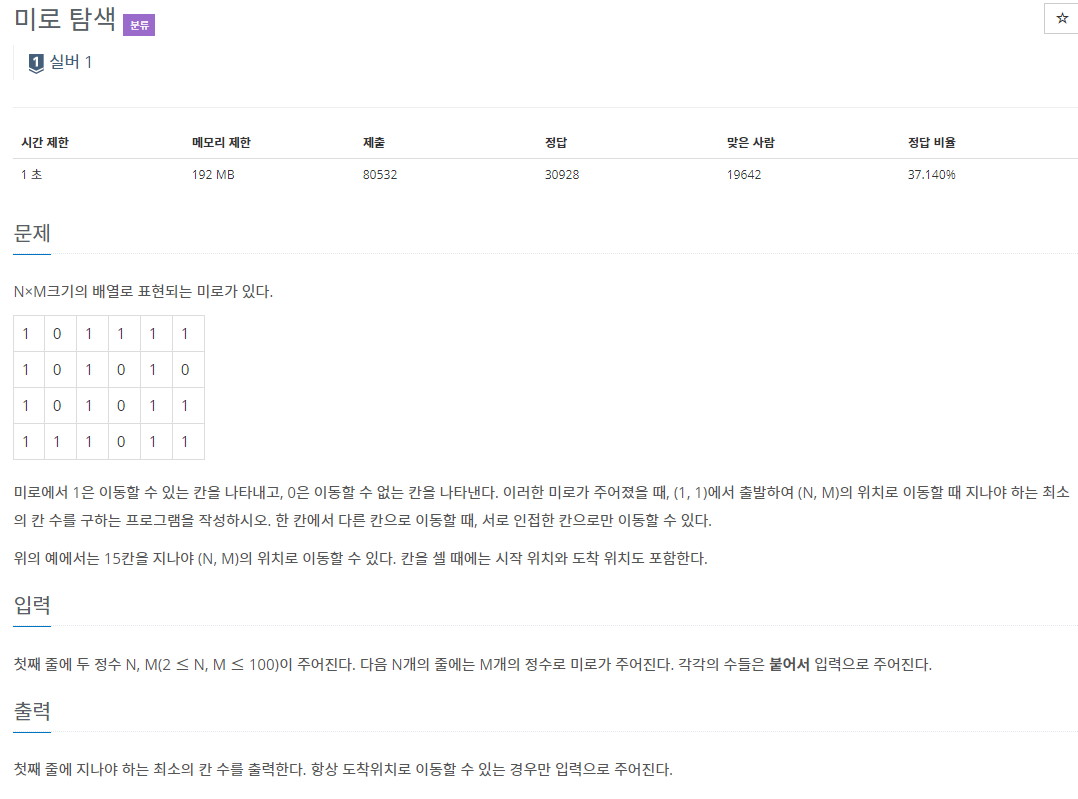

In [8]:
import sys
from collections import deque

# N, M 입력 받기
N, M = map(int, sys.stdin.readline().split())
graph = [[] for i in range(N)]
visited = [[0] * M for i in range(N)]

# graph 행렬 만들기
for i in range(N):
    num = sys.stdin.readline()
    for j in range(M):
        graph[i].append(int(num[j]))
# 북서남동
dx = (-1, 0, 1, 0); dy = (0, -1, 0, 1)

# bfs : 최단 거리
def bfs(x, y):
    queue = deque()
    visited[x][y] = 1
    queue.append((x, y))         
    while queue:
        x, y = queue.popleft()
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            if 0 <= nx < N and 0 <= ny < M:
                if visited[nx][ny] == 0 and graph[nx][ny] == 1 :
                    queue.append((nx, ny))
                    visited[nx][ny] = visited[x][y] + 1
                
    return (visited[N-1][M-1])

print(bfs(0, 0))

4 6
110110
110110
111111
111101


9

##### 그래프 탐색 문제 2: 단지번호붙이기(실버 1)
https://www.acmicpc.net/problem/2667

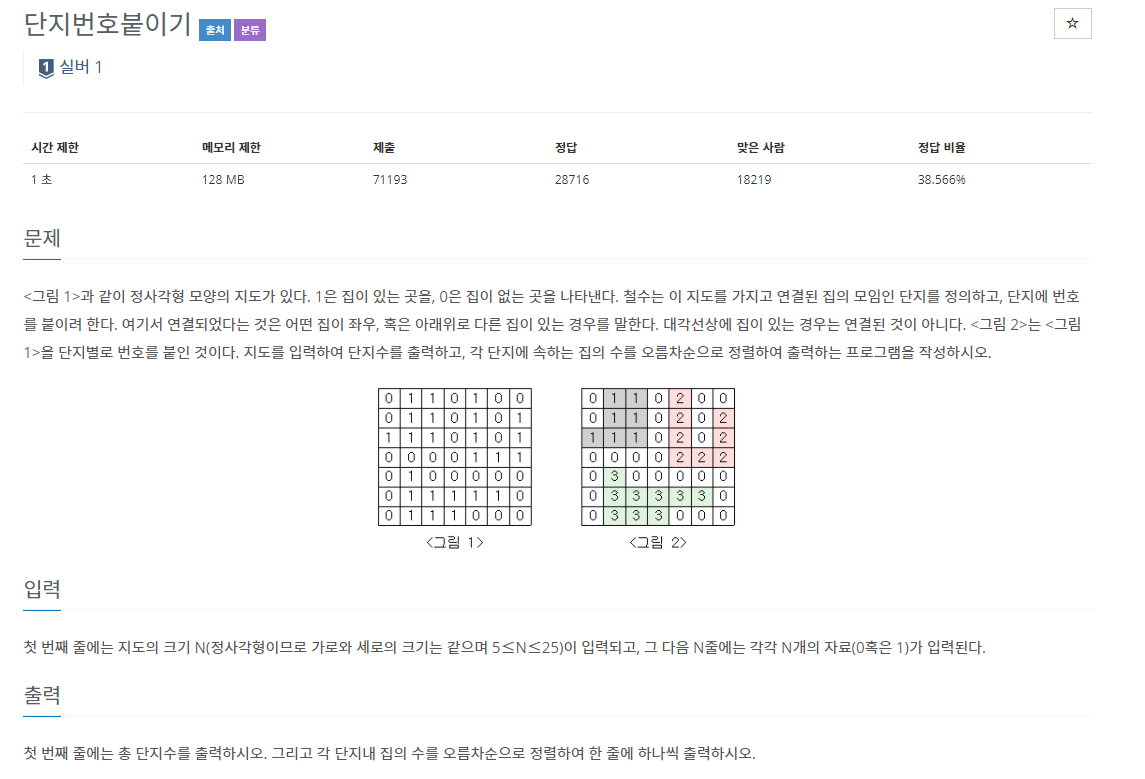

In [26]:
import sys
from collections import deque

N = int(sys.stdin.readline()) 
graph = [[] for i in range(N)]
visited = [[0] * N for i in range(N)]; sums=[]

# graph 행렬 만들기
for i in range(N):
    num = sys.stdin.readline()
    for j in range(N):
        graph[i].append(int(num[j]))

# 북서남동
dx = [-1, 0, 1, 0]
dy = [0, -1, 0, 1]
        
def bfs(x, y):
    queue = deque()
    for k in range(N):
        for h in range(N):
            if graph[k][h] == 1 and visited[k][h] == 0:
                queue.append((k, h))
                visited[k][h] = 1
                c = 1
                while queue:
                    x, y = queue.popleft()
                    for i in range(4):
                        nx = x + dx[i]
                        ny = y + dy[i]
                        if 0 <= nx < N and 0 <= ny < N:
                            if visited[nx][ny] == 0 and graph[nx][ny] == 1:
                                queue.append((nx, ny))
                                visited[nx][ny] = 1
                                c += 1
                sums.append(c)

bfs(0, 0)
print(len(sums))
sums.sort()
for i in sums:
    print(i)

7
0110100
0110101
1110101
0000111
0100000
0111110
0111000
3
7
8
9


##### 그래프 탐색 문제 3: 토마토(실버 1)
https://www.acmicpc.net/problem/7576

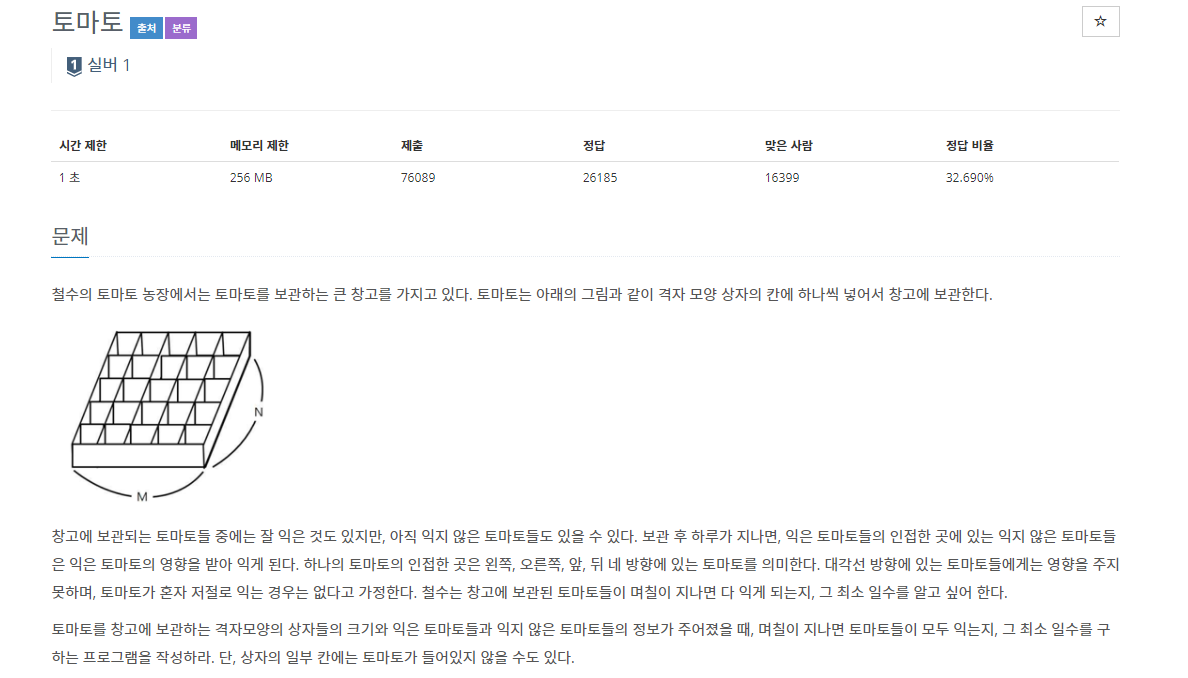

In [66]:
import sys
from collections import deque

# N(가로), M(세로) 입력 받기
N, M = map(int, sys.stdin.readline().split())
graph = []
visited = [[0] * N for i in range(M)]

# graph 행렬 만들기
for i in range(M):
    graph.append(list(map(int, sys.stdin.readline().split())))

# 북서남동
dx = [-1, 0, 1, 0]
dy = [0, -1, 0, 1]

def bfs(x, y):
    queue = deque()
    for i in range(M):
        for j in range(N):
            if visited[i][j] == 0 and graph[i][j] == 1:
                visited[i][j] = 1
                queue.append((i, j))
    while queue:
        x, y = queue.popleft()
        for k in range(4):
            nx = x + dx[k]
            ny = y + dy[k]
            if 0 <= nx < M and 0 <= ny < N and visited[nx][ny] == 0 and graph[nx][ny] == 0:
                visited[nx][ny] = 1
                graph[nx][ny] = graph[x][y] + 1
                queue.append((nx, ny))
                
bfs(0, 0); exist = False; maxx = 0

for i in range(M):
    for j in range(N):
        if graph[i][j] == 0:
            exist = True
        if maxx < graph[i][j]:
            maxx = graph[i][j]

if not exist:
    if maxx == 1:
        print(0)
    else:
        print(maxx - 1)
else:
    print(-1)

6 4
1 -1 0 0 0 0
0 -1 0 0 0 0
0 0 0 0 -1 0
0 0 0 0 -1 1
6
